In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def pull_data():
    df = pd.read_csv('../data/life-expectancy.csv')
    df = df.loc[df['Code'] == 'USA']
    df.reset_index(drop=True, inplace=True)
    df = df.drop(index =0)
    df = df.drop(index =1)
    df.rename(columns={"Period life expectancy at birth - Sex: total - Age: 0": "Life Expectancy",}, inplace = True)
    df.drop(columns=["Entity", "Code"], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df 


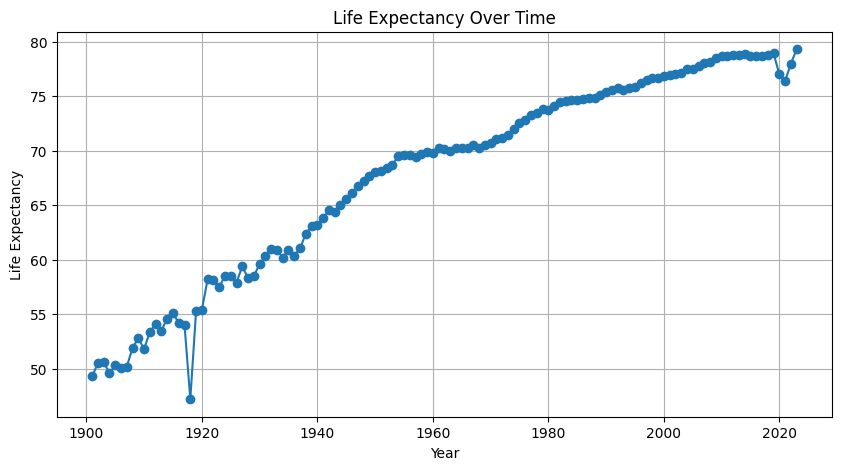

In [86]:
df = pull_data()


plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Life Expectancy'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.grid(True)
plt.show()

In [18]:
result_original = adfuller(df["Life Expectancy"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

#second order differencing
df['Life Expectancy_Diff'] = df['Life Expectancy'].diff().diff()

result_diff = adfuller(df['Life Expectancy_Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

ADF Statistic (Original): -2.5285
p-value (Original): 0.1087
Interpretation: The original series is Non-Stationary.

ADF Statistic (Differenced): -6.2236
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


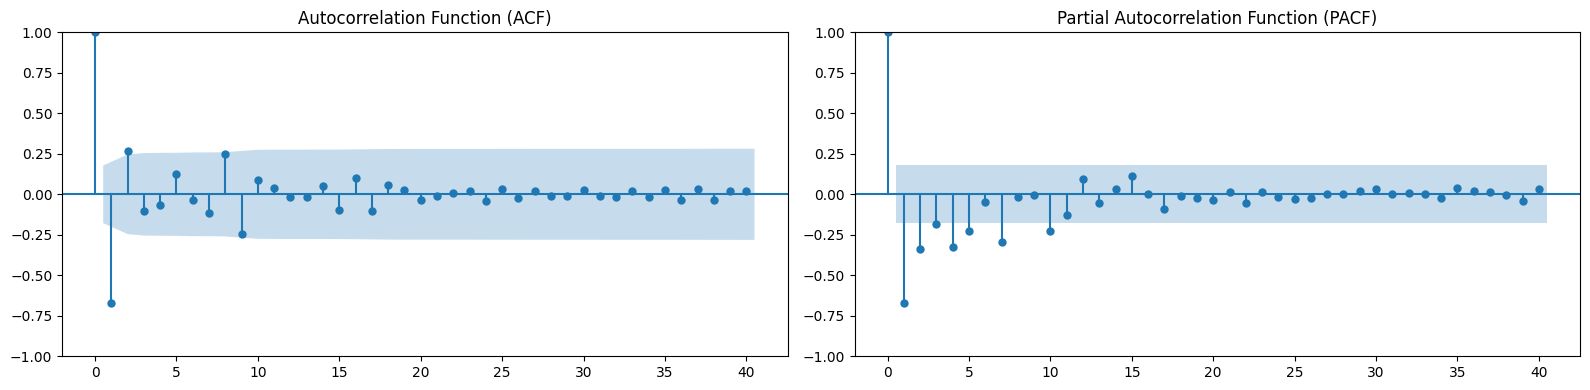

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(df['Life Expectancy_Diff'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Life Expectancy_Diff'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#p --> 3 or 4 
#q --> 2 or 3 
#d --> 2

#(p, d, q)

In [85]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

p_range = range(0, 4)  
d_range = range(0, 4)  
q_range = range(0, 4) 

order_combinations = list(itertools.product(p_range, d_range, q_range))

train_data = train["Life Expectancy"]

results = []

for order in order_combinations:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        bic = model_fit.bic
        results.append((order, aic, bic))
        print(f"ARIMA{order} - AIC: {aic:.2f}, BIC: {bic:.2f}")
    except:
        continue  

results_df = pd.DataFrame(results, columns=["Order", "AIC", "BIC"])

best_model = results_df.loc[results_df["AIC"].idxmin()]
print(f"\nBest ARIMA Order (by AIC): {best_model['Order']} with AIC: {best_model['AIC']:.2f}")


ARIMA(0, 0, 0) - AIC: 699.72, BIC: 704.89
ARIMA(0, 0, 1) - AIC: 596.66, BIC: 604.42
ARIMA(0, 0, 2) - AIC: 531.50, BIC: 541.84
ARIMA(0, 0, 3) - AIC: 466.12, BIC: 479.05
ARIMA(0, 1, 0) - AIC: 320.48, BIC: 323.05
ARIMA(0, 1, 1) - AIC: 312.36, BIC: 317.51
ARIMA(0, 1, 2) - AIC: 312.85, BIC: 320.58
ARIMA(0, 1, 3) - AIC: 313.35, BIC: 323.65
ARIMA(0, 2, 0) - AIC: 412.69, BIC: 415.25
ARIMA(0, 2, 1) - AIC: 319.74, BIC: 324.87
ARIMA(0, 2, 2) - AIC: 302.92, BIC: 310.61
ARIMA(0, 2, 3) - AIC: 304.39, BIC: 314.65
ARIMA(0, 3, 0) - AIC: 524.97, BIC: 527.53
ARIMA(0, 3, 1) - AIC: 415.97, BIC: 421.08
ARIMA(0, 3, 2) - AIC: 328.62, BIC: 336.28


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

ARIMA(0, 3, 3) - AIC: 313.27, BIC: 323.49
ARIMA(1, 0, 0) - AIC: 332.19, BIC: 339.95
ARIMA(1, 0, 1) - AIC: 324.24, BIC: 334.58
ARIMA(1, 0, 2) - AIC: 324.70, BIC: 337.63
ARIMA(1, 0, 3) - AIC: 325.23, BIC: 340.74
ARIMA(1, 1, 0) - AIC: 310.34, BIC: 315.49
ARIMA(1, 1, 1) - AIC: 312.08, BIC: 319.81
ARIMA(1, 1, 2) - AIC: 314.01, BIC: 324.31
ARIMA(1, 1, 3) - AIC: 315.16, BIC: 328.03
ARIMA(1, 2, 0) - AIC: 353.19, BIC: 358.32
ARIMA(1, 2, 1) - AIC: 304.55, BIC: 312.24
ARIMA(1, 2, 2) - AIC: 303.29, BIC: 313.55


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

ARIMA(1, 2, 3) - AIC: 306.52, BIC: 319.34
ARIMA(1, 3, 0) - AIC: 435.23, BIC: 440.34
ARIMA(1, 3, 1) - AIC: 358.15, BIC: 365.81
ARIMA(1, 3, 2) - AIC: 314.50, BIC: 324.72
ARIMA(1, 3, 3) - AIC: 314.13, BIC: 326.90
ARIMA(2, 0, 0) - AIC: 322.22, BIC: 332.56
ARIMA(2, 0, 1) - AIC: 323.95, BIC: 336.87
ARIMA(2, 0, 2) - AIC: 325.86, BIC: 341.37
ARIMA(2, 0, 3) - AIC: 327.03, BIC: 345.13
ARIMA(2, 1, 0) - AIC: 312.06, BIC: 319.78
ARIMA(2, 1, 1) - AIC: 314.06, BIC: 324.36
ARIMA(2, 1, 2) - AIC: 316.06, BIC: 328.93
ARIMA(2, 1, 3) - AIC: 303.38, BIC: 318.82
ARIMA(2, 2, 0) - AIC: 341.25, BIC: 348.94
ARIMA(2, 2, 1) - AIC: 306.35, BIC: 316.61
ARIMA(2, 2, 2) - AIC: 308.44, BIC: 321.26
ARIMA(2, 2, 3) - AIC: 299.54, BIC: 314.92
ARIMA(2, 3, 0) - AIC: 399.59, BIC: 407.25
ARIMA(2, 3, 1) - AIC: 346.98, BIC: 357.19


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

ARIMA(2, 3, 2) - AIC: 316.38, BIC: 329.15
ARIMA(2, 3, 3) - AIC: 318.44, BIC: 333.76
ARIMA(3, 0, 0) - AIC: 323.92, BIC: 336.84
ARIMA(3, 0, 1) - AIC: 325.92, BIC: 341.43
ARIMA(3, 0, 2) - AIC: 313.88, BIC: 331.98


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

ARIMA(3, 0, 3) - AIC: 323.66, BIC: 344.34
ARIMA(3, 1, 0) - AIC: 314.06, BIC: 324.35
ARIMA(3, 1, 1) - AIC: 316.02, BIC: 328.89
ARIMA(3, 1, 2) - AIC: 315.43, BIC: 330.88
ARIMA(3, 1, 3) - AIC: 301.89, BIC: 319.91
ARIMA(3, 2, 0) - AIC: 339.63, BIC: 349.89
ARIMA(3, 2, 1) - AIC: 307.12, BIC: 319.94
ARIMA(3, 2, 2) - AIC: 310.19, BIC: 325.57
ARIMA(3, 2, 3) - AIC: 299.33, BIC: 317.28
ARIMA(3, 3, 0) - AIC: 392.27, BIC: 402.48
ARIMA(3, 3, 1) - AIC: 345.74, BIC: 358.51


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

ARIMA(3, 3, 2) - AIC: 350.24, BIC: 365.57
ARIMA(3, 3, 3) - AIC: 321.45, BIC: 339.32

Best ARIMA Order (by AIC): (3, 2, 3) with AIC: 299.33


/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wdgstl/UVA/ForcastingLifeExpectancy/myvenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


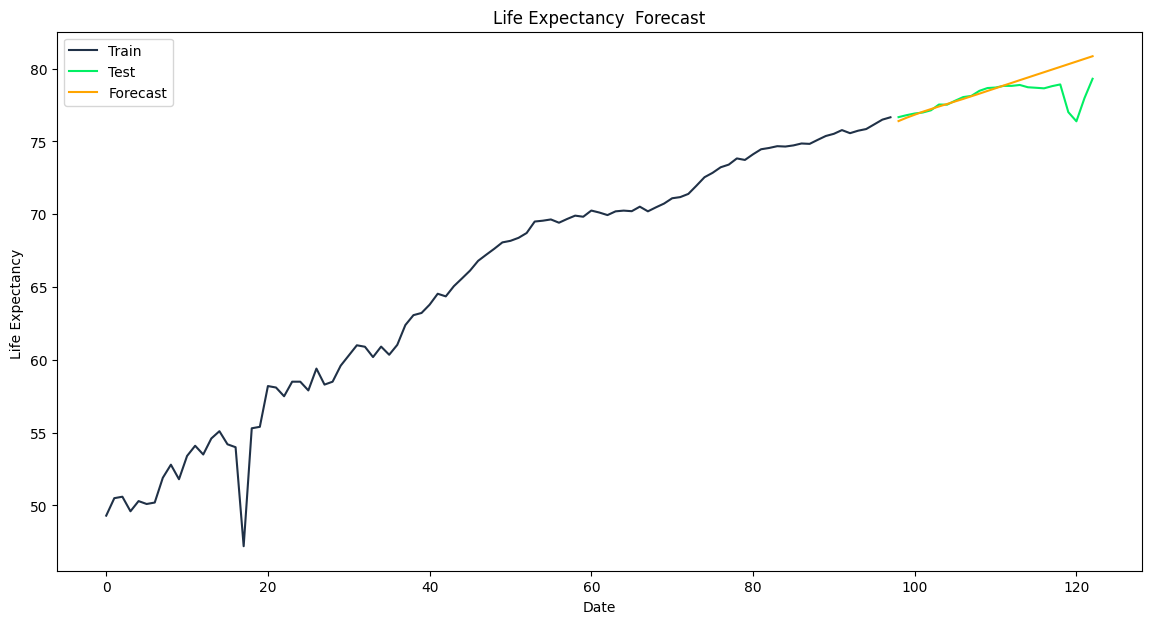

In [84]:
best_model = ARIMA(train_data, order=(3,2,3))
best_model_fit = best_model.fit()
forecast = best_model_fit.forecast(steps=len(test))


plt.figure(figsize=(14,7))
plt.plot(train.index, train["Life Expectancy"], label='Train', color='#203147')
plt.plot(test.index, test["Life Expectancy"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Life Expectancy  Forecast')
plt.xlabel('Date')
plt.ylabel('Life Expectancy ')
plt.legend()
plt.show()

In [73]:
forecast = forecast[:len(test)]
test_life = test["Life Expectancy"][:len(forecast)]

rmse = np.sqrt(mean_squared_error(test_life, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 2.8472
